In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df1=pd.read_csv("K-Mart Sales Datasets/Sales_January_2019.csv")
df1["month"]="Jan"
df2=pd.read_csv("K-Mart Sales Datasets/Sales_February_2019.csv")
df2["month"]="Feb"
df3=pd.read_csv("K-Mart Sales Datasets/Sales_March_2019.csv")
df3["month"]="Mar"
df4=pd.read_csv("K-Mart Sales Datasets/Sales_April_2019.csv")
df4["month"]="Apr"
df5=pd.read_csv("K-Mart Sales Datasets/Sales_May_2019.csv")
df5["month"]="May"
df6=pd.read_csv("K-Mart Sales Datasets/Sales_June_2019.csv")
df6["month"]="Jun"
df7=pd.read_csv("K-Mart Sales Datasets/Sales_July_2019.csv")
df7["month"]="Jul"
df8=pd.read_csv("K-Mart Sales Datasets/Sales_August_2019.csv")
df8["month"]="Aug"
df9=pd.read_csv("K-Mart Sales Datasets/Sales_September_2019.csv")
df9["month"]="Sep"
df10=pd.read_csv("K-Mart Sales Datasets/Sales_October_2019.csv")
df10["month"]="Oct"
df11=pd.read_csv("K-Mart Sales Datasets/Sales_November_2019.csv")
df11["month"]="Nov"
df12=pd.read_csv("K-Mart Sales Datasets/Sales_December_2019.csv")
df12["month"]="Dec"
list=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

In [3]:
for i in list:
    print(i.shape)

(9723, 7)
(12036, 7)
(15226, 7)
(18383, 7)
(16635, 7)
(13622, 7)
(14371, 7)
(12011, 7)
(11686, 7)
(20379, 7)
(17661, 7)
(25117, 7)


In [4]:
frame=pd.concat(list)

In [5]:
frame.shape

(186850, 7)

In [6]:
frame.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month'],
      dtype='object')

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   month             186850 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [8]:
frame.isnull().sum() # there are 545 null values in each column except month

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month                 0
dtype: int64

In [9]:
(frame.isnull().sum().sum())/len(frame)*100  # we have 1.75 percent null values , so we can drop them

1.75006689858175

In [10]:
frame=frame.dropna()
frame.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
month               0
dtype: int64

In [11]:
frame[frame['Quantity Ordered'] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Jan
...,...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dec


In [12]:
df_filtered = frame[frame['Quantity Ordered'] != "Quantity Ordered"] 
df_filtered.head(15) 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",Jan
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",Jan
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",Jan
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",Jan
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",Jan


In [13]:
df_filtered.shape

(185950, 7)

<b>What was the best month for sales? How much was earned that month?

In [14]:
df_filtered["Quantity Ordered"]=df_filtered["Quantity Ordered"].astype("float")
df_filtered["Price Each"]=df_filtered["Price Each"].astype("float")
# Creating Sales Column By multiplying Quantity Ordered and Price of Each Product
df_filtered["Sales"]=df_filtered["Quantity Ordered"]*df_filtered["Price Each"]

<ipython-input-14-747857febf3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Quantity Ordered"]=df_filtered["Quantity Ordered"].astype("float")
<ipython-input-14-747857febf3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Price Each"]=df_filtered["Price Each"].astype("float")
<ipython-input-14-747857febf3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [19]:
df_filtered.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99
5,141239,AAA Batteries (4-pack),1.0,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",Jan,2.99
6,141240,27in 4K Gaming Monitor,1.0,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",Jan,389.99
7,141241,USB-C Charging Cable,1.0,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",Jan,11.95
8,141242,Bose SoundSport Headphones,1.0,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",Jan,99.99
9,141243,Apple Airpods Headphones,1.0,150.00,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",Jan,150.00


In [16]:
df_filtered['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [20]:
x = []
for i in df_filtered['month'].unique():
    month_sales = df_filtered[df_filtered['month']==i]['Sales'].sum()
    x.append(round(month_sales,2))

In [21]:
print(x)

[1815335.12, 2203481.24, 2809063.3, 3396059.11, 3144584.8, 2578293.3, 2646899.69, 2244412.31, 2098816.7, 3736884.05, 3198909.23, 4619297.12]


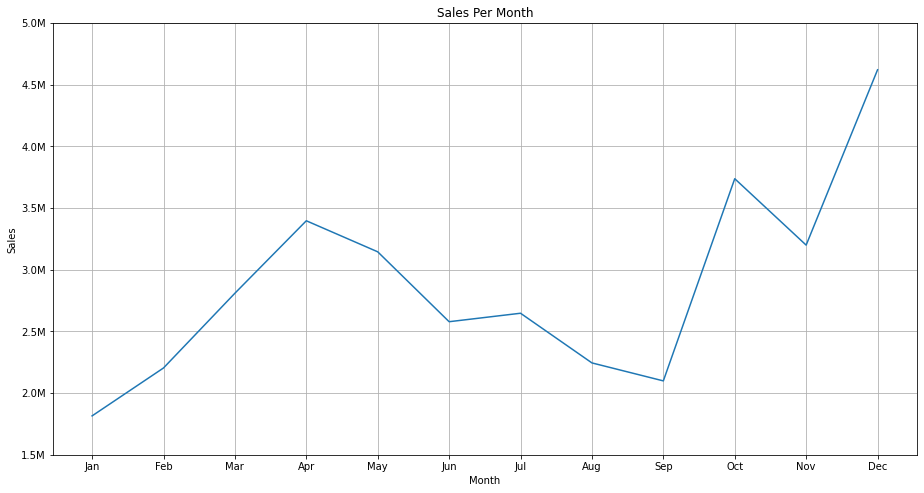

In [43]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(df_filtered['month'].unique(),x)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Per Month')
plt.grid(True)
plt.yticks(ticks=np.arange(1500000,5000001,500000), labels=['1.5M','2.0M','2.5M','3.0M','3.5M','4.0M','4.5M','5.0M'])
plt.show()

<b>Which city had the highest number of sales?

In [31]:
dftemp = df_filtered
list_city = []
for i in dftemp['Purchase Address']:
    list_city.append(i.split(",")[1])
dftemp['City'] = list_city
dftemp.head()

<ipython-input-31-8afe78ba96cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp['City'] = list_city


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Jan,700.00,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Jan,14.95,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",Jan,23.98,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Jan,149.99,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Jan,11.99,Austin


In [33]:
df_city=df_filtered.groupby(["City"])['Sales'].sum().sort_values(ascending=False)
df_city=df_city.to_frame()
df_city

,Sales
City,
San Francisco,8.262204e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Boston,3.661642e+06
Atlanta,2.795499e+06
Dallas,2.767975e+06
Seattle,2.747755e+06
Portland,2.320491e+06
Austin,1.819582e+06


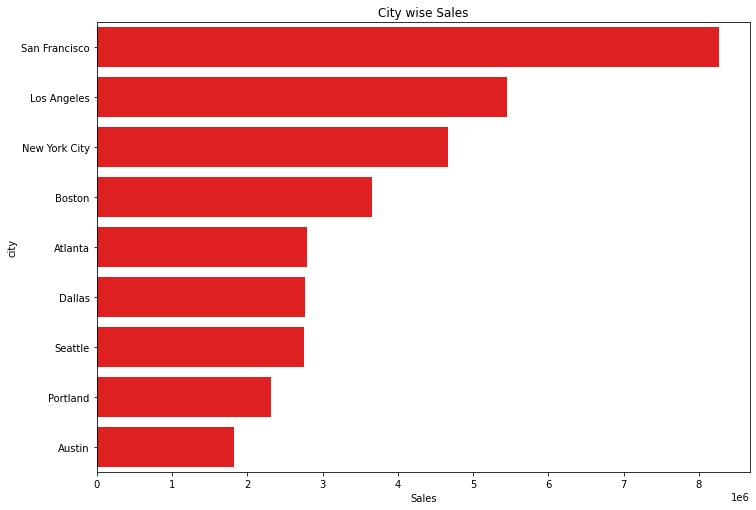

In [36]:
city=["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
df_city["city"]=city
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x = "Sales",
            y = "city",
            data = df_city, color='red')
plt.title("City wise Sales")
plt.show()

<b>What products sold the most?

In [37]:
print(df_filtered["Product"].unique())
print(df_filtered["Product"].nunique())

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']
19


In [38]:
df_p=df_filtered.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False).head()
df_p=df_p.to_frame()
df_p

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0


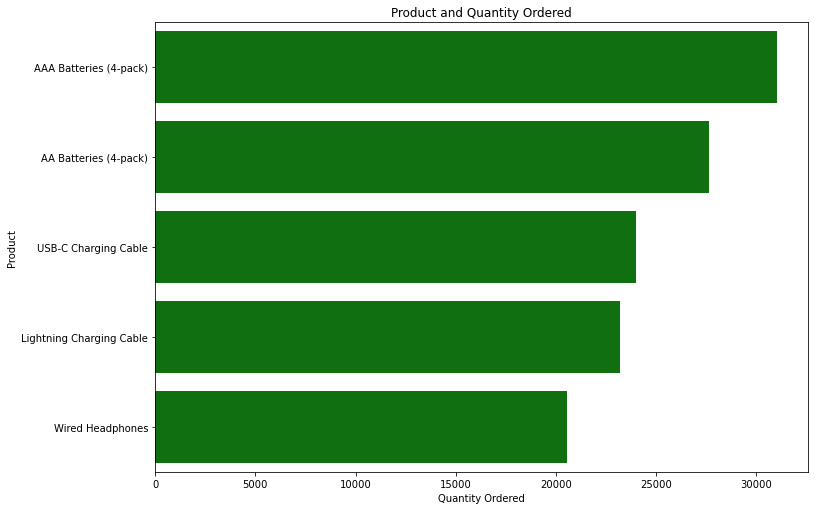

In [41]:
product=["AAA Batteries (4-pack)","AA Batteries (4-pack)","USB-C Charging Cable","Lightning Charging Cable","Wired Headphones"]
df_p["Product"]=product
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x = "Quantity Ordered",
            y = "Product",
            data = df_p, color='green')
plt.title("Product and Quantity Ordered")
plt.show()